In [105]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

from keras.utils import plot_model
# import data
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [106]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Before shape
X_train.shape

(60000, 28, 28)

In [107]:
# reshape to be [samples][pixels][width][height]
##Height is generally 3 if its a colored picture, 1 for each color channel
X_train_reshape = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_reshape = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train_reshape.shape

(60000, 28, 28, 1)

In [108]:
#Normalize 0-1
X_train_reshape = X_train_reshape / 255 # normalize training data
X_test_reshape = X_test_reshape / 255 # normalize test data

In [109]:
##One hot encoding categorical variables to 1-10 vecgtor for digit recogitiosn
y_train_reshape = to_categorical(y_train)
y_test_reshape = to_categorical(y_test)

num_classes = y_test_reshape.shape[1] # number of categories
num_classes

10

In [110]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    ##Pooling layer takes the output of compressing the input
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    ##Flatten to 1D
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

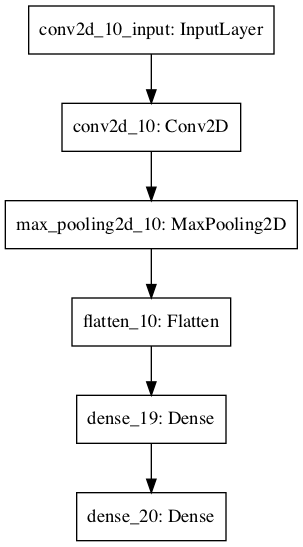

In [111]:
plot_model(model)

In [112]:
X_train_reshape.shape

(60000, 28, 28, 1)

In [113]:
# build the model
model = convolutional_model()

# fit the model
history = model.fit(X_train_reshape, y_train_reshape, validation_data=(X_test_reshape, y_test_reshape), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test_reshape, y_test_reshape, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2934 - accuracy: 0.9189 - val_loss: 0.0914 - val_accuracy: 0.9725
Epoch 2/10
 - 8s - loss: 0.0819 - accuracy: 0.9764 - val_loss: 0.0664 - val_accuracy: 0.9801
Epoch 3/10
 - 8s - loss: 0.0581 - accuracy: 0.9832 - val_loss: 0.0463 - val_accuracy: 0.9861
Epoch 4/10
 - 8s - loss: 0.0429 - accuracy: 0.9874 - val_loss: 0.0431 - val_accuracy: 0.9867
Epoch 5/10
 - 8s - loss: 0.0360 - accuracy: 0.9894 - val_loss: 0.0373 - val_accuracy: 0.9880
Epoch 6/10
 - 8s - loss: 0.0298 - accuracy: 0.9909 - val_loss: 0.0400 - val_accuracy: 0.9864
Epoch 7/10
 - 8s - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.0374 - val_accuracy: 0.9874
Epoch 8/10
 - 8s - loss: 0.0193 - accuracy: 0.9944 - val_loss: 0.0392 - val_accuracy: 0.9863
Epoch 9/10
 - 8s - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.0368 - val_accuracy: 0.9870
Epoch 10/10
 - 8s - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0438 - val_accuracy: 0.9853
Accuracy: 0.9853000

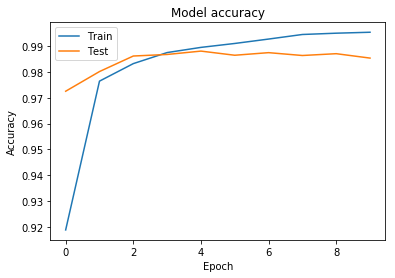

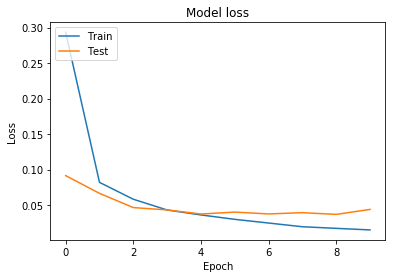

In [114]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [116]:
y_hat = model.predict(X_test_reshape)

for index in range(0,len(y_hat)):
    if np.argmax(y_hat[index])+1 != np.argmax(y_test_reshape[index])+1:
        truth = y_test[index]
        image = X_test[index]
        prediction = np.argmax(y_hat[index])+1
        plt.title('Index = {} Truth - {} Precition - {} \n Confidence Prd - {:.4} Confidence Truth - {:.4}'.format(
            index,truth,prediction,y_hat[index][prediction-1],y_hat[index][truth-1]))
        plt.imshow(image)
        plt.savefig('Image_{}.png'.format(index))

In [138]:
y_hat[18][2]

0.0025791132

## Double Convulutional

In [140]:
def double_convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [141]:
# build the model
double_model = double_convolutional_model()

# fit the model
history = double_model.fit(X_train_reshape, y_train_reshape, validation_data=(X_test_reshape, y_test_reshape), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = double_model.evaluate(X_test_reshape, y_test_reshape, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.4603 - accuracy: 0.8710 - val_loss: 0.1142 - val_accuracy: 0.9663
Epoch 2/10
 - 9s - loss: 0.1035 - accuracy: 0.9689 - val_loss: 0.0751 - val_accuracy: 0.9768
Epoch 3/10
 - 9s - loss: 0.0750 - accuracy: 0.9771 - val_loss: 0.0651 - val_accuracy: 0.9789
Epoch 4/10
 - 9s - loss: 0.0633 - accuracy: 0.9807 - val_loss: 0.0646 - val_accuracy: 0.9791
Epoch 5/10
 - 9s - loss: 0.0552 - accuracy: 0.9830 - val_loss: 0.0560 - val_accuracy: 0.9822
Epoch 6/10
 - 9s - loss: 0.0480 - accuracy: 0.9858 - val_loss: 0.0548 - val_accuracy: 0.9834
Epoch 7/10
 - 10s - loss: 0.0430 - accuracy: 0.9869 - val_loss: 0.0462 - val_accuracy: 0.9857
Epoch 8/10
 - 10s - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.0437 - val_accuracy: 0.9863
Epoch 9/10
 - 9s - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.0439 - val_accuracy: 0.9869
Epoch 10/10
 - 9s - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0395 - val_accuracy: 0.9880
Accuracy: 0.98799

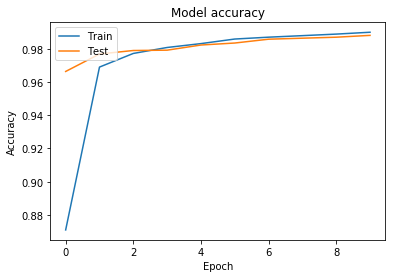

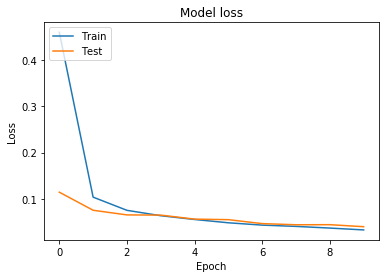

In [142]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

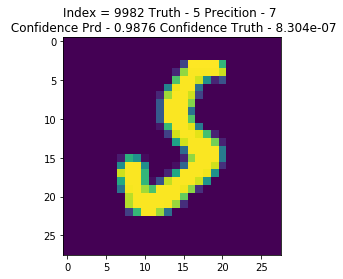

In [144]:
y_hat = double_model.predict(X_test_reshape)

for index in range(0,len(y_hat)):
    if np.argmax(y_hat[index])+1 != np.argmax(y_test_reshape[index])+1:
        truth = y_test[index]
        image = X_test[index]
        prediction = np.argmax(y_hat[index])+1
        plt.title('Index = {} Truth - {} Precition - {} \n Confidence Prd - {:.4} Confidence Truth - {:.4}'.format(
            index,truth,prediction,y_hat[index][prediction-1],y_hat[index][truth-1]))
        plt.imshow(image)
        plt.savefig('DBImage_{}.png'.format(index))